### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

Top 10 countries by alcohol consumption: 
           country  total_litres_of_pure_alcohol
           Belarus                          14.4
         Lithuania                          12.9
           Andorra                          12.4
           Grenada                          11.9
    Czech Republic                          11.8
            France                          11.8
Russian Federation                          11.5
           Ireland                          11.4
        Luxembourg                          11.4
          Slovakia                          11.4

Average servings of alcohol per person:
Average beer servings: 106.16
Average wine servings: 49.45
Average spirits servings: 80.99

Countries with more than 100 litres of alcohol consumed per year:
                     country  beer_servings
                     Namibia            376
              Czech Republic            361
                       Gabon            347
                     Germany            346


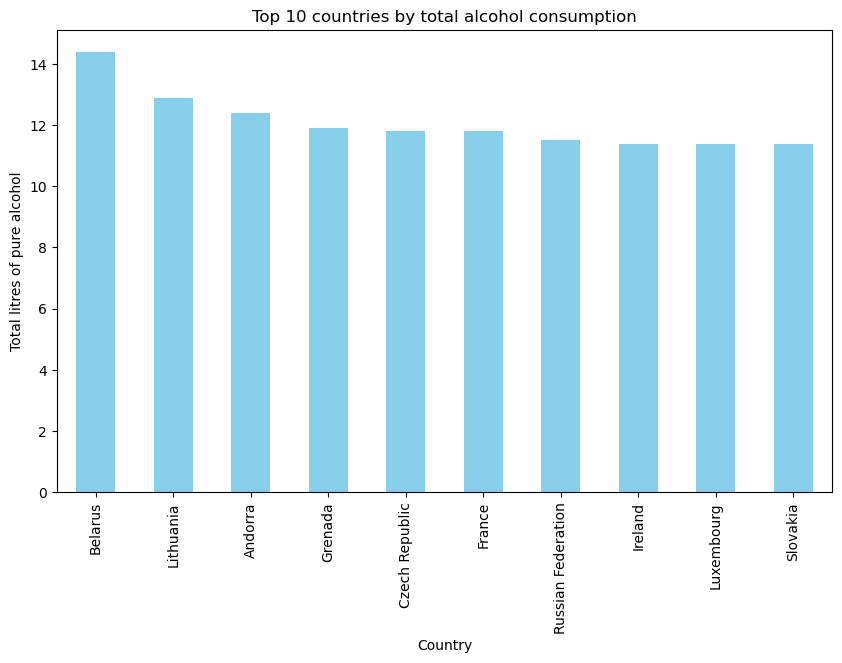

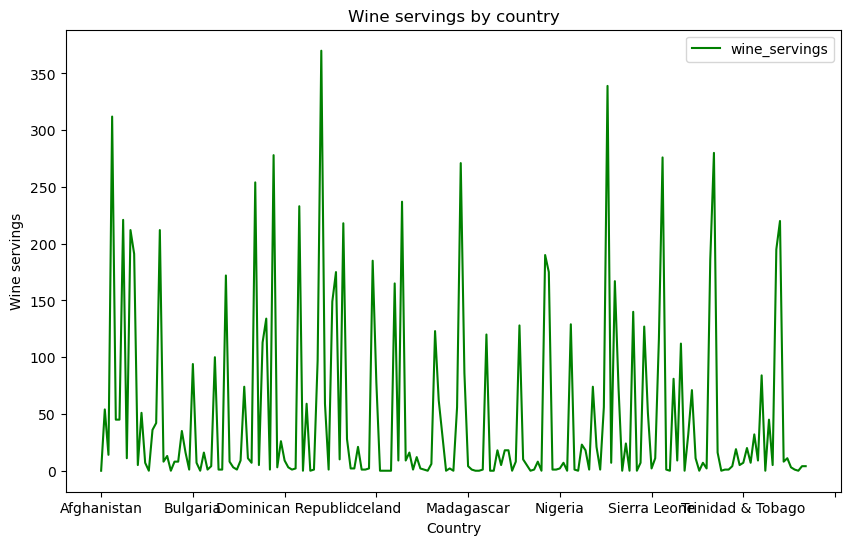

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
#10 paesi ordinati per consumo di alcol
top_10_countries = df.nlargest(10, 'total_litres_of_pure_alcohol')[['country', 'total_litres_of_pure_alcohol']]
#top_10_countries = df.nlargest(10, 'total_litres_of_pure_alcohol')
print(f"Top 10 countries by alcohol consumption: \n{top_10_countries.to_string(index=False)}")
#media del consumo di birra, vino e liquori
beer_mean = df['beer_servings'].mean()
wine_mean = df['wine_servings'].mean()
spirits_mean = df['spirit_servings'].mean() 
print("\nAverage servings of alcohol per person:")
print(f"Average beer servings: {beer_mean:.2f}")
print(f"Average wine servings: {wine_mean:.2f}")
print(f"Average spirits servings: {spirits_mean:.2f}")
#nuova colonna alcohol_index
df['alcohol_index']= (df['beer_servings']+df['wine_servings']+df['spirit_servings'])/3
#paesi che consumano piu di 100 birre all'anno
high_consumption_countries = df[df['beer_servings'] > 100][['country', 'beer_servings']].sort_values(by='beer_servings', ascending=False)
print("\nCountries with more than 100 litres of alcohol consumed per year:")
print(high_consumption_countries.to_string(index=False))

#barchart con i 10 paesi con piu consumo di alcol
top_10_countries.plot.bar(
    x='country',
    y='total_litres_of_pure_alcohol',
    title='Top 10 countries by total alcohol consumption',
    legend=False,
    xlabel='Country',
    ylabel='Total litres of pure alcohol',
    color='skyblue',
    figsize=(10,6)
)
plt.show()
#line plot con wine_servings ordinato per paese
df.sort_values(by='country', inplace=True)
df.plot.line(
    x='country',
    y='wine_servings',
    title='Wine servings by country',
    xlabel='Country',
    ylabel='Wine servings',
    color='green',
    figsize=(10,6)
)
plt.show()

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [ ]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])